# Here we will learn how to remove trend and Seasonality from our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
miles_df = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\us-airlines-monthly-aircraft-miles-flown.csv",
                      header=0,
                      parse_dates=[0])

In [3]:
miles_df.head(10)

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
5,1963-06-01,9644
6,1963-07-01,10466
7,1963-08-01,10748
8,1963-09-01,9963
9,1963-10-01,8194


In [4]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [5]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


Now to remove trend we need to subtract this leg one values from this MilesMM values. The resultant series should not contain any Trend. After subtracting our differencing this lag1 value

In [6]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1) # This should not contain any trend

In [7]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

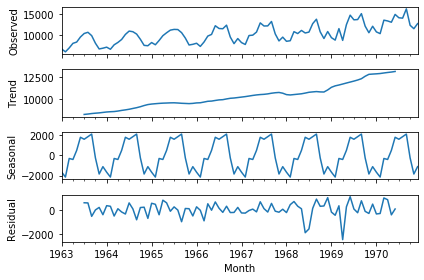

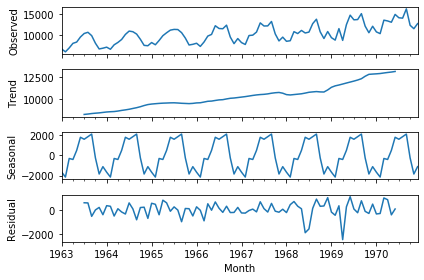

In [9]:
# Decomposing plot of our original Miles series

miles_df.index = miles_df['Month']
res_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
res_a.plot()

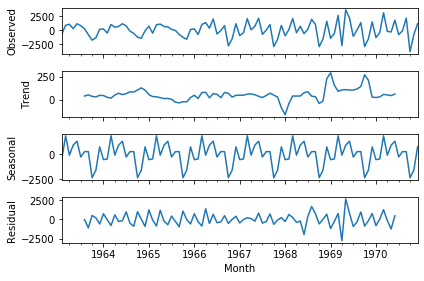

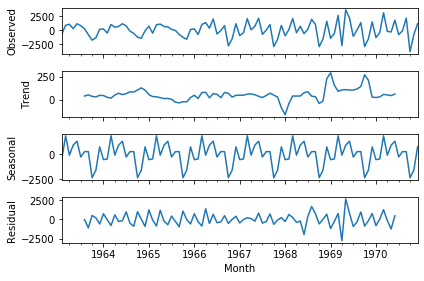

In [10]:
# This is the Decompose model of our difference series

# MilesMM_diff_1 1st value is NaN, To avoid that we will be using iloc

miles_df.index = miles_df['Month']
res_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
res_b.plot()

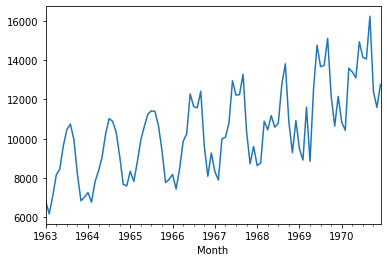

In [11]:
miles_df['MilesMM'].plot()

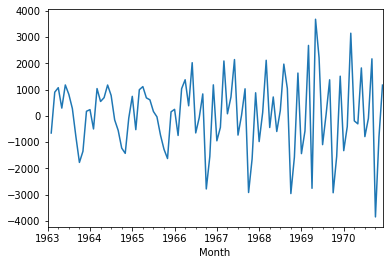

In [12]:
miles_df['MilesMM_diff_1'].plot()

In [13]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

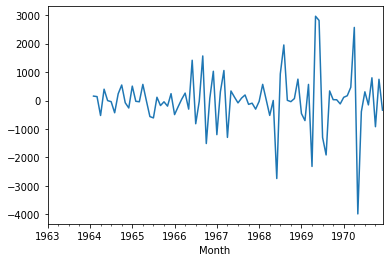

In [14]:
miles_df['MilesMM_diff_12'].plot()

In [15]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


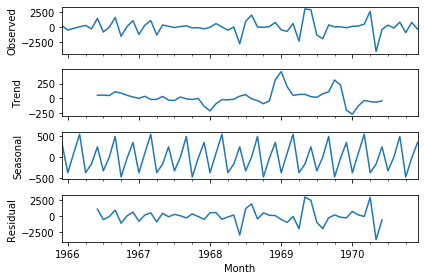

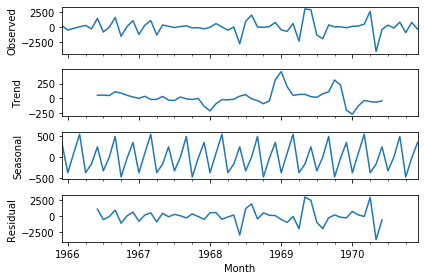

In [16]:
result_c = seasonal_decompose(miles_df.iloc[35:,4],model='additive')
result_c.plot()

## Train Test Split

In [17]:
temp_df = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\daily-min-temperatures.csv",
                      header=0,
                      parse_dates=[0])

This is 10 years of our data, we will be using 8 years of data for Training and 2 years of data for Testing

In [18]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [19]:
temp_df.shape

(3650, 2)

In [20]:
temp_df.shape[0]

3650

In [21]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [22]:
train = temp_df[0:train_size]

In [23]:
test = temp_df[train_size:]

In [24]:
train.shape

(2920, 2)

In [25]:
test.shape

(730, 2)

# Naive Forecast

In Naive Forecast we can simply assume that the last period value is the forecast for this period  

In [26]:
df = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\daily-min-temperatures.csv",
                      header=0,
                      parse_dates=[0])

In [27]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [28]:
# Create a lag value

df['t'] = df['Temp'].shift(1)

In [29]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


Temp : y
    
t : x

In [30]:
df.shape

(3650, 3)

In [31]:
# We will take last 7 values as test data

# df[1:df.shape[0]-7] : We are taking all the values expect 1st value and last 7 values

train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [32]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [33]:
train_x, train_y = train['t'], train['Temp']
test_x, test_y = test['t'], test['Temp']

## Walk-Forward validation

Now since we are building a naive forecast model there is no need to create any another model we can just use x values as our forecasted value.

In [34]:
predictions = test_x.copy()

In [35]:
print(predictions)
print("---------------------------------")
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
---------------------------------
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [36]:
# Checking errors in our predictions

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

The MSE value is very important because we are going to evaluate our advance models using this MSE value. 

##### IF OUR ADVANCE MODEL IS GIVING US A MSE VALUE WHICH IS GREATER THAN THIS VALUE THAN WE CAN SAY THAT OUR MODEL IS NOT ABLE TO EXTRACT ANY INFORMATION FROM THAT DATA & WE CAN CONSIDER THAT TIME SERIES DATA AS A RANDOM WALK. SINCE WE ARE NOT ABLE TO EXTRACT ANY INFORMATION BETTER THAN THE NAIVE FORECAST MODEL.

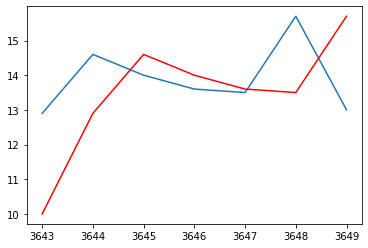

In [37]:
plt.plot(test_y)
plt.plot(predictions, color='red')

In [38]:
# We will take last 7 values as test data

# df[1:df.shape[0]-7] : We are taking all the values expect 1st value and last 7 values

train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [39]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [40]:
from statsmodels.tsa.ar_model import AR

In [41]:
model = AR(train)
model_fit = model.fit()

In [42]:
model_fit.k_ar

29

In [43]:
# Co-efficient of all the 29 lag values

model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [44]:
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [45]:
pred

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [46]:
pred.iloc[0] # First Forecasted value

11.871274847727832

In [47]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_y,pred)
MSE

1.501525231006988

Our error is decreasing from 3.4 to 1.5 by using AR model.

So we can say that the Time Series we are using is not a random walk. There is some information stored in that time series & we are extracting that info using AR model.

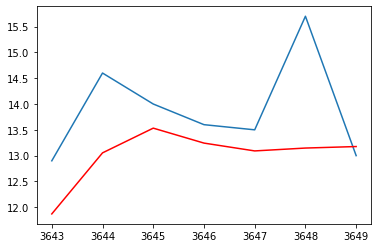

In [48]:
plt.plot(test_y)

plt.plot(pred, color="red")


# Walk Forward

In [49]:
# Here we are creating a new dataset "data" this is the dataset in which we are going to add our test values for future pred.


data = train 
predict = [] # Here we will store predicted value of Y 
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data=np.append(data,t)
    data=pd.Series(data)

11.871274847727832
13.660699943835198
14.353164144090158
13.43012079162701
13.374756477185123
13.47911129942051
14.767773018439883


In [50]:
predict

[11.871274847727832,
 13.660699943835198,
 14.353164144090158,
 13.43012079162701,
 13.374756477185123,
 13.47911129942051,
 14.767773018439883]

In [51]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test.values,predict)
MSE

1.452456842518536

Comapre to the Naive forecast our error is reduced.

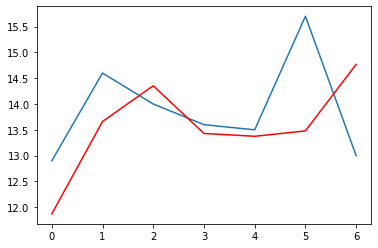

In [52]:
plt.plot(test.values)

plt.plot(predict, color="red")


# Moving Average Model

In [53]:
df_val = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\daily-min-temperatures.csv",
                header=0,
                parse_dates=[0])

In [54]:
df_val

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [55]:
df_val['t'] = df_val['Temp'].shift(1)

In [56]:
df_val['Resid'] = df['Temp']-df_val['t']

In [57]:
df_val.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [58]:
train = df_val.Resid[1:df_val.shape[0]-7]
test = df_val.Resid[df_val.shape[0]-7:]

In [59]:
test.head()

3643    2.9
3644    1.7
3645   -0.6
3646   -0.4
3647   -0.1
Name: Resid, dtype: float64

In [60]:
from statsmodels.tsa.ar_model import AR

In [61]:
model = AR(train)
model_fit=model.fit()

In [62]:
model_fit.k_ar # How many variables are important in this Auto Regression Residual Model

29

In [63]:
# L1.Resid : Laged val in residuals


model_fit.params   # Co-efficient of all the variables

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [64]:
# Here we will be predicting Forecaste Residual for the next value in time series.

pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [65]:
pred_resid  # Forcasted Residual value

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [66]:
# To get forcasted value of time series we have to add this pred_resid to the forecasted live value

pr = df_val.t[df_val.shape[0]-7:]+pred_resid

In [67]:
pr

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_y,pr)
MSE

2.049398556648206

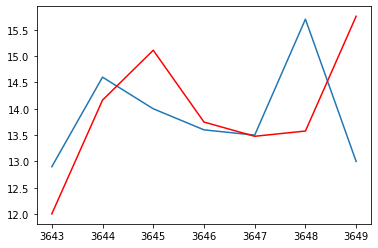

In [69]:
plt.plot(test_y)
plt.plot(pr,color="red")

# ARIMA Model

In [70]:
data_f = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\shampoo.csv",
                    header=0,
                    parse_dates=[0])

In [71]:
data_f.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


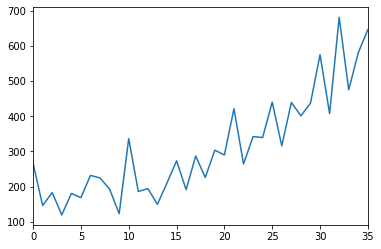

In [72]:
data_f.Sales.plot()

There is no seasonality as such and there is some sort of trend. The trend is increasing with time. So this is some sort of Quadratic graph. It is a Quadratic trend we need 2 differencing it make it stationary.

d = 2

### Autocorrelation Plot

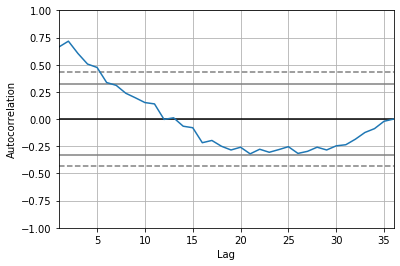

In [73]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_f['Sales'])

Here the line is crossing after 5 Therefore

p = 5

### Partial Autocorrelation Graph

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf

These are Auto Correlation with lag variable

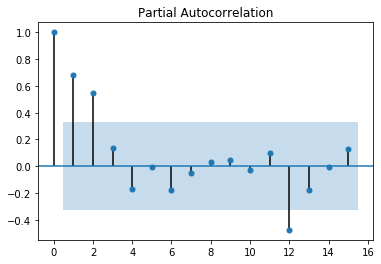

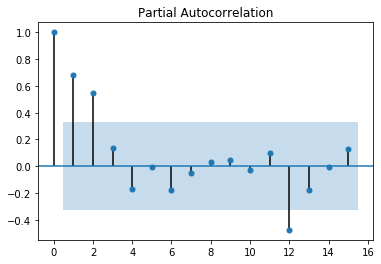

In [75]:
plot_pacf(data_f['Sales'], lags=15)

Auto Correlation is crossing the confident interval at value 3.

Therefore we should consider q = 2 

##### So now we have the value of p,q and d we should train our ARIMA model with this parameters

In [76]:
from statsmodels.tsa.arima_model import ARIMA

model_1 = ARIMA(data_f['Sales'], order=(5,2,2)) #q, p, d

In [77]:
model_fit = model_1.fit()

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [78]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.352
Date:                Sat, 16 May 2020   AIC                            396.067
Time:                        19:18:44   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.001       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1231      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6012      0.478     -3.353      0.002      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.018      -1.834      -0.229
ar.L5.D2.Sales    -0.3193      0.193     -1.653      0.110      -0.698       0.059
ma.L1.D2.Sales    -0.0006      0.120     -0.005      0.996      -0.235       0.234
ma.L2.D2.Sales    -0.9994      0.119     -8.364      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1409           -1.3030j            1.3106           -0.2329
AR.2            0.1409           +1.3030j            1.3106            0.2329
AR.3           -1.1312           -0.4225j            1.2076           -0.4431
AR.4           -1.1312           +0.4225j            1.2076            0.4431
AR.5           -1.2502           -0.0000j            1.2502           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0006           +0.0000j            1.0006            0.5000
-----------------------------------------------------------------------------
"""

Smaller the "p" value more important that variable is.

In [79]:
residual_model = model_fit.resid

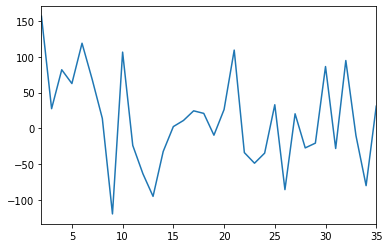

In [80]:
residual_model.plot()

The residual should be in the form of white noise there should be no visible item in our residual.

If there is residual in our model that means we need to improve our model and we are missing something.

In [81]:
residual_model.describe()

count     34.000000
mean      11.293801
std       65.989803
min     -119.298472
25%      -31.199461
50%       12.480484
75%       55.129230
max      156.383319
dtype: float64

### Variation


* ARIMA :

model = ARIMA(df['Sales'], order=(q,d,p)) 



* Autoregression :

model = ARIMA(df['Sales'], order=(p,d,0))



* Moving Average Model :

model = ARIMA(df['Sales'], order=(0,d,q))

In [82]:
output = model_fit.forecast()

In [83]:
output                        # Forecast value, Standard Deviation, 95% confidence interval for that value.

(array([636.10423122]),
 array([54.35220095]),
 array([[529.57587488, 742.63258756]]))

In [84]:
# If i want forecasted values for next 5 periods

model_fit.forecast(5)

(array([636.10423122, 709.21893146, 664.2775505 , 771.1363476 ,
        761.53883277]),
 array([54.35220095, 55.30304518, 57.4647952 , 58.19196956, 60.28343006]),
 array([[529.57587488, 742.63258756],
        [600.82695467, 817.61090825],
        [551.64862153, 776.90647947],
        [657.08218307, 885.19051212],
        [643.385481  , 879.69218455]]))

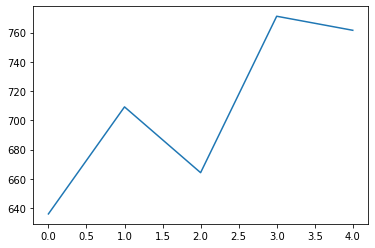

In [85]:
plt.plot(model_fit.forecast(5)[0])

# Walk Forward ARIMA

In [89]:
d = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\shampoo.csv",
                    header=0,
                    parse_dates=[0])

In [90]:
# Dividing our Data with test and train

train_size = int(d.shape[0]*0.7)

In [92]:
train = d.Sales[0:train_size]

test = d.Sales[train_size:]

In [93]:
train.shape

(25,)

In [94]:
test.shape

(11,)

In [97]:
data = train
predict = []
for t in test:
    model2 = ARIMA(data, order=(5,1,0))
    model_fit = model2.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

387.37647478263585
348.1542056973947
386.30881592483445
356.08200302442935
446.379450616756
394.737307675965
434.9154896262969
507.9234619160874
435.4827558938956
652.743801551763
546.3434835086496


In [98]:
predict

[387.37647478263585,
 348.1542056973947,
 386.30881592483445,
 356.08200302442935,
 446.379450616756,
 394.737307675965,
 434.9154896262969,
 507.9234619160874,
 435.4827558938956,
 652.743801551763,
 546.3434835086496]

In [99]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test.values, predict)
MSE

8119.12382940744